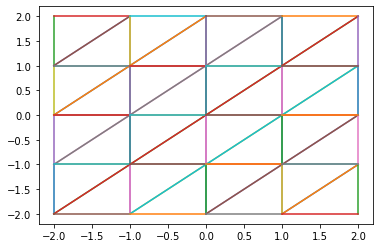

In [1]:
from matplotlib import pyplot as plt

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __repr__(self):
        return f'point: x={self.x}, y={self.y}'
    
    def __add__(self, other):
        return Point(self.x + other.x, self.y + other.y)
    
    def __rmul__(self, s):
        return Point(s * self.x, s * self.y)
    
    def midpoint(self, other):
        return Point(self.x + 0.5 * (other.x - self.x),  self.y + 0.5 * (other.y - self.y))
    
class Line:
    def __init__(self, a, b):
        self.a = a
        self.b = b
    
#      def __repr__(self):
#         return f'{self.a} to {self.b}'

class Triangle:
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c

    def draw(self):
        plt.plot((self.a.x, self.b.x), (self.a.y, self.b.y))
        plt.plot((self.b.x, self.c.x), (self.b.y, self.c.y))
        plt.plot((self.c.x, self.a.x), (self.c.y, self.a.y))
        
    def subdivision(self):
        ab_mid = self.a.midpoint(self.b)
        bc_mid = self.b.midpoint(self.c)
        ca_mid = self.c.midpoint(self.a)
        triangles = []
        triangles.append(Triangle(self.a, ab_mid, ca_mid))
        triangles.append(Triangle(ab_mid, self.b, bc_mid))
        triangles.append(Triangle(ca_mid, bc_mid, self.c))
        triangles.append(Triangle(ab_mid, bc_mid, ca_mid))
        return triangles
      
    def __repr__(self):
        return f'[a:{self.a}, b:{self.b}, c:{self.c}]'
        
class Area:
    def __init__(self, start, length, step):
        self.start = start
        self.length = length
        self.step = step
        
    def gen_triangles(self):
        triangles = []
        total = int(self.length / self.step)
        for n in range(0, total):
            point = Point(self.start.x, self.start.y + n * self.step)
            for m in range(0, total):
                a = point
                b = Point(a.x, a.y + self.step)
                c = Point(a.x + self.step, a.y + self.step)
                d = Point(a.x + self.step, a.y)
                point = d
                triangles.append(Triangle(a, b, c))
                triangles.append(Triangle(a, c, d))
        return triangles
    
def draw_triangles(triangles):
    for triangle in triangles:
        triangle.draw()

area = Area(Point(-2, -2), 4, 1)
triangles = area.gen_triangles()
draw_triangles(triangles)
# triangles

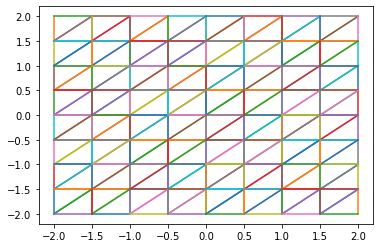

In [2]:
def sub(triangles):
    sub_triangles = []
    for triangle in triangles:
        sub_triangles.extend(triangle.subdivision())
    return sub_triangles

subtriangles = sub(triangles)
draw_triangles(subtriangles)

In [3]:
class PointNeighbor:
    def __init__(self, point, step, left_down_point, righ_up_point):
        self.point = point
        self.left_down_point = left_down_point
        self.righ_up_point = righ_up_point
        self.neighbors = []
        up = Point(self.point.x, self.point.y + step)
        self.add_neighbor(up)
        down = Point(self.point.x, self.point.y - step)
        self.add_neighbor(down)
        right = Point(self.point.x + step, self.point.y)
        self.add_neighbor(right)
        left = Point(self.point.x - step, self.point.y)
        self.add_neighbor(left)
        up_right = Point(self.point.x + step, self.point.y + step)
        self.add_neighbor(up_right)
        left_down = Point(self.point.x - step, self.point.y - step)
        self.add_neighbor(left_down)
        
    def add_neighbor(self, neighbor):
        if (left_down_point.x <= neighbor.x <= righ_up_point.x and left_down_point.y <= neighbor.y <= righ_up_point.y):
            self.neighbors.append(neighbor)
            
    def __repr__(self):
        return f'{self.point}, neighbors:{self.neighbors}'
    
    def refs(self, vertexes):
        self.rs = []
        for neighbor in self.neighbors:
            for vertexe in vertexes:
                if neighbor.x == vertexe.point.x and neighbor.y == vertexe.point.y:
                    self.rs.append(vertexe)
                    break
            
start_point = Point(-2, -2)
step = 0.5
left_down_point = Point(-2, -2)
righ_up_point = Point(2, 2)

vertexes = []
# vertexes.append(PointNeighbor(start_point, step, left_down_point, righ_up_point))
for n in range(0, int(4 / step)):
    point = Point(start_point.x, start_point.y + n * step)
    for m in range(0, int(4 / step)):
        neighbor = Point(point.x + m * step, point.y)
        vertexes.append(PointNeighbor(neighbor, step, left_down_point, righ_up_point))
    
vertexes

[point: x=-2.0, y=-2.0, neighbors:[point: x=-2.0, y=-1.5, point: x=-1.5, y=-2.0, point: x=-1.5, y=-1.5],
 point: x=-1.5, y=-2.0, neighbors:[point: x=-1.5, y=-1.5, point: x=-1.0, y=-2.0, point: x=-2.0, y=-2.0, point: x=-1.0, y=-1.5],
 point: x=-1.0, y=-2.0, neighbors:[point: x=-1.0, y=-1.5, point: x=-0.5, y=-2.0, point: x=-1.5, y=-2.0, point: x=-0.5, y=-1.5],
 point: x=-0.5, y=-2.0, neighbors:[point: x=-0.5, y=-1.5, point: x=0.0, y=-2.0, point: x=-1.0, y=-2.0, point: x=0.0, y=-1.5],
 point: x=0.0, y=-2.0, neighbors:[point: x=0.0, y=-1.5, point: x=0.5, y=-2.0, point: x=-0.5, y=-2.0, point: x=0.5, y=-1.5],
 point: x=0.5, y=-2.0, neighbors:[point: x=0.5, y=-1.5, point: x=1.0, y=-2.0, point: x=0.0, y=-2.0, point: x=1.0, y=-1.5],
 point: x=1.0, y=-2.0, neighbors:[point: x=1.0, y=-1.5, point: x=1.5, y=-2.0, point: x=0.5, y=-2.0, point: x=1.5, y=-1.5],
 point: x=1.5, y=-2.0, neighbors:[point: x=1.5, y=-1.5, point: x=2.0, y=-2.0, point: x=1.0, y=-2.0, point: x=2.0, y=-1.5],
 point: x=-2.0, y=-1

In [4]:
import functools 

for v in vertexes:
    v.refs(vertexes)

def loop_subdivsion(vertex):
    n = len(vertex.rs)
    u = 3.0 / 16.0 if n == 3 else 3.0 / (8.0 * n)
    p = Point(0.0, 0.0)
    for v in vertex.rs:
        p = p + v.point
    vertex.point = (1.0 - n * u) * vertex.point + u * p
    
mid = int(len(vertexes) / 2) + 4
loop_subdivsion(vertexes[mid])
vertexes[mid].rs
forward = mid
backward = mid
while forward < len(vertexes) and backward >= 0:
    forward = forward + 1
    if forward < len(vertexes):
        loop_subdivsion(vertexes[forward])
    backward = backward - 1
    if backward >= 0:
        loop_subdivsion(vertexes[backward])

In [5]:
points = []
for v in vertexes:
    points.append(v.point)
points

[point: x=-2.0, y=-2.0,
 point: x=-1.5, y=-2.0,
 point: x=-1.0, y=-2.0,
 point: x=-0.5, y=-2.0,
 point: x=0.0, y=-2.0,
 point: x=0.5, y=-2.0,
 point: x=1.0, y=-2.0,
 point: x=1.5, y=-2.0,
 point: x=-1.896552501580823, y=-1.4482762507904114,
 point: x=-1.5000002181864716, y=-1.5000001090932358,
 point: x=-1.0000024121791284, y=-1.5000012060895642,
 point: x=-0.5000247152202064, y=-1.5000123576101032,
 point: x=-0.00022746878676116467, y=-1.5001137343933806,
 point: x=0.4981825016438961, y=-1.500908749178052,
 point: x=0.9862225651741028, y=-1.5068887174129486,
 point: x=1.396559715270996, y=-1.551720142364502,
 point: x=-1.8965597235168161, y=-0.9482798617584081,
 point: x=-1.5000000751588232, y=-1.0000000375794116,
 point: x=-1.0000010036455933, y=-1.0000005018227967,
 point: x=-0.5000128760002553, y=-1.0000064380001277,
 point: x=-0.00015509873628616333, y=-1.000077549368143,
 point: x=0.4983330965042114, y=-1.0008334517478943,
 point: x=0.9863643646240234, y=-1.0068178176879883,
 poi

## Libraries Of Geometry

[LibIGL](https://libigl.github.io/)

#### install conda on mac

```bash
wget https://repo.anaconda.com/miniconda/Miniconda3-latest-MacOSX-x86_64.sh -O ~/miniconda.sh
bash ~/miniconda.sh -b -p $HOME/miniconda
```
set miniconda/bin to path

```bash
conda install -c conda-forge igl
```

[set conda on jupyter](https://medium.com/@nrk25693/how-to-add-your-conda-environment-to-your-jupyter-notebook-in-just-4-steps-abeab8b8d084)

[PyMesh](https://github.com/PyMesh/PyMesh)

In [6]:
import numpy as np
import scipy

In [7]:
import sys
sys.version

'3.8.6 | packaged by conda-forge | (default, Oct  7 2020, 18:42:56) \n[Clang 10.0.1 ]'

In [8]:
import igl

In [9]:
import IPython.display

In [10]:
import meshplot as mp

In [11]:
import os
v, f = igl.read_triangle_mesh(os.path.join('assert', 'bunny_small.off'))
k = igl.gaussian_curvature(v, f)
#%meshplot inline
mp.plot(v, f)

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016860…

In [12]:
data = np.load('./assert/meshplot_data.npz')
v, f, n, fs = data["v"], data["f"], data["n"], data["fs"]
v1, f1, v2, f2 = data["v1"], data["f1"], data["v2"], data["f2"]

In [13]:
mp.plot(v, f)

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016860…

In [14]:
import ipyvolume as ipv

In [15]:
N = 1000
x, y, z = np.random.normal(0, 1, (3, N))

In [16]:
fig = ipv.figure()
scatter = ipv.scatter(x, y, z, marker='sphere')
ipv.show()

In [17]:
import ipyvolume as ipv
import numpy as np
x, y, z = np.random.random((3, 10000))
ipv.quickscatter(x, y, z, size=1, marker="sphere")